https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Video Classification - HOT or NOT

### Import stuff

In [1]:

# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb


Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.23.1


In [2]:
path_folder = r"C:\Users\eilon.eilstein\Desktop\Eilon\SQL\PlayStudios_Home_Task\Data\\"

df_vc = pd.read_csv(path_folder+'video_count.csv')#.set_index('video_id')
df_vf = pd.read_csv(path_folder+'video_features.csv')#.set_index('video_id')
df_vf['video_quality'] = df_vf['video_quality'].apply(lambda x: int(x[:-1]))

df_vf[df_vf.video_id == 70]

,video_id,video_length,video_language,video_upload_date,video_quality
69,70,18,english,03/09/2017,480


In [3]:
import datetime as dt



df_joined = df_vc.merge(df_vf, left_on='video_id', right_on='video_id', how='left')#.drop(columns=['video_id_FEAT'])
df_joined['date'] = pd.to_datetime(df_joined.date, format='%d/%m/%Y')
df_joined['week_start_date'] = df_joined.date - pd.to_timedelta((df_joined['date'].dt.dayofweek + 1) % 7, unit='d')
df_joined['video_upload_date'] = pd.to_datetime(df_joined.video_upload_date)
df_joined['days_from_upload'] = df_joined.date - df_joined.video_upload_date
df_joined['days_from_upload'] = df_joined['days_from_upload'].apply(lambda x: float(x.days))
df_joined.sort_values('date')
# df_joined.dtypes
df_joined[df_joined.video_id == 70]

,video_id,date,count,CLASS,video_length,video_language,video_upload_date,video_quality,week_start_date,days_from_upload
2956,70,2017-12-28,51,NaN,18,english,2017-03-09,480,2017-12-24,294.0
3185,70,2018-01-01,52,NaN,18,english,2017-03-09,480,2017-12-31,298.0
3433,70,2017-12-18,54,NaN,18,english,2017-03-09,480,2017-12-17,284.0
3761,70,2017-12-07,57,NaN,18,english,2017-03-09,480,2017-12-03,273.0
4288,70,2017-12-22,61,NaN,18,english,2017-03-09,480,2017-12-17,288.0
...,...,...,...,...,...,...,...,...,...,...
11401,70,2017-09-04,138,NaN,18,english,2017-03-09,480,2017-09-03,179.0
11568,70,2017-09-14,145,1.0,18,english,2017-03-09,480,2017-09-10,189.0
11569,70,2017-09-24,145,1.0,18,english,2017-03-09,480,2017-09-24,199.0
11633,70,2017-09-07,148,1.0,18,english,2017-03-09,480,2017-09-03,182.0


In [4]:
df_wk_avg = df_joined[['week_start_date', 'count']].groupby('week_start_date')['count'].mean()
df_wk_avg.head(6)

week_start_date
2017-09-03    101.064516
2017-09-10    100.981982
2017-09-17    101.383886
2017-09-24    100.910596
2017-10-01     94.012788
2017-10-08     93.652439
Name: count, dtype: float64

In [5]:
df_joined_with_avg = df_joined.join(df_wk_avg, on='week_start_date', rsuffix='_week_AVG')
df_joined_with_avg['Avg_Offset'] = df_joined_with_avg['count'] - df_joined_with_avg.count_week_AVG.apply(lambda x: int(x))
df_joined_with_avg.sort_values('week_start_date')

,video_id,date,count,CLASS,video_length,video_language,video_upload_date,video_quality,week_start_date,days_from_upload,count_week_AVG,Avg_Offset
6974,70,2017-09-03,80,NaN,18,english,2017-03-09,480,2017-09-03,178.0,101.064516,-21
11345,16,2017-09-09,137,NaN,24,spanish,2017-08-09,1080,2017-09-03,31.0,101.064516,36
10177,70,2017-09-05,112,NaN,18,english,2017-03-09,480,2017-09-03,180.0,101.064516,11
2897,32,2017-09-08,50,NaN,29,english,2017-07-09,240,2017-09-03,61.0,101.064516,-51
9627,73,2017-09-03,105,NaN,25,chineese,2017-03-09,480,2017-09-03,178.0,101.064516,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1702,36,2018-02-25,40,NaN,21,chineese,2017-10-30,480,2018-02-25,118.0,39.750000,1
3189,23,2018-02-26,52,NaN,26,spanish,2017-10-29,720,2018-02-25,120.0,39.750000,13
1152,92,2018-02-25,34,NaN,26,english,2017-10-30,240,2018-02-25,118.0,39.750000,-5
878,92,2018-02-26,31,NaN,26,english,2017-10-30,240,2018-02-25,119.0,39.750000,-8


In [6]:
df_joined.groupby('video_language').size()

video_language
chineese    4169
english     3929
spanish     3805
dtype: int64

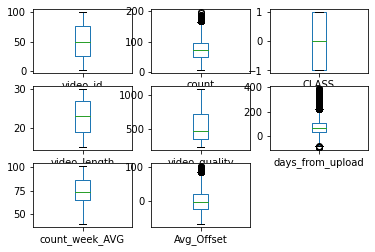

In [7]:
df_joined_with_avg.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [9]:
encode = ['video_language']

for col in encode:
    dummy = pd.get_dummies(df_joined_with_avg[col], prefix=col)
    df_with_dummies = pd.concat([df_joined_with_avg,dummy], axis=1)
    del df_with_dummies[col]

target_col_name = 'CLASS'    
cols = ['video_length', 'video_quality', 'days_from_upload', 'video_language_chineese', 'video_language_english', 'video_language_spanish', 'count_week_AVG', target_col_name]
df_test = df_with_dummies[df_with_dummies['CLASS'] > -2][cols]
# df_test = df_with_dummies[cols]
df_test.head()

,video_length,video_quality,days_from_upload,video_language_chineese,video_language_english,video_language_spanish,count_week_AVG,CLASS
0,30,240,231.0,0,0,1,55.857494,-1.0
1,30,240,236.0,0,0,1,54.736677,-1.0
2,30,240,235.0,0,0,1,54.736677,-1.0
3,30,240,229.0,0,0,1,55.857494,-1.0
4,30,240,238.0,0,0,1,54.736677,-1.0


In [10]:


df_with_dummies[cols].loc[500]

video_length                30.000000
video_quality              360.000000
days_from_upload           186.000000
video_language_chineese      1.000000
video_language_english       0.000000
video_language_spanish       0.000000
count_week_AVG              59.914573
CLASS                             NaN
Name: 500, dtype: float64

In [11]:
df_with_dummies.head()

,video_id,date,count,CLASS,video_length,video_upload_date,video_quality,week_start_date,days_from_upload,count_week_AVG,Avg_Offset,video_language_chineese,video_language_english,video_language_spanish
0,3,2018-01-27,6,-1.0,30,2017-06-10,240,2018-01-21,231.0,55.857494,-49,0,0,1
1,3,2018-02-01,6,-1.0,30,2017-06-10,240,2018-01-28,236.0,54.736677,-48,0,0,1
2,3,2018-01-31,6,-1.0,30,2017-06-10,240,2018-01-28,235.0,54.736677,-48,0,0,1
3,3,2018-01-25,7,-1.0,30,2017-06-10,240,2018-01-21,229.0,55.857494,-48,0,0,1
4,3,2018-02-03,7,-1.0,30,2017-06-10,240,2018-01-28,238.0,54.736677,-47,0,0,1


In [12]:
# Split-out validation dataset

X = df_test.drop(columns=target_col_name).values
y = df_test[target_col_name].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
print(len(X_train))
print(len(X_validation))
print(len(Y_train))
print(len(Y_validation))

1050
450
1050
450


In [13]:
X_train[1]

array([ 30.        , 240.        ,  99.        ,   1.        ,
         0.        ,   0.        ,  57.52859961])

In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
test_pred = clf.predict(X_validation)
score = accuracy_score(Y_validation, test_pred, )
score

0.9644444444444444

In [56]:
list(Y_validation)

[-1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0

In [15]:
print(len(Y_validation))
offset = [(Y_validation[i] / test_pred[i]) -1 for i in range(len(test_pred)) if abs(Y_validation[i] / test_pred[i]) < 2]
print(len(offset))
# offset2 = Y_validation / test_pred - 1
# We can set the number of bins with the `bins` kwarg
lbls = [-1, 0, 1]
cm = confusion_matrix(Y_validation, test_pred, labels=lbls)
cm


450
289


<ipython-input-15-52ffce00e6a8>:2: RuntimeWarning: invalid value encountered in double_scalars
  offset = [(Y_validation[i] / test_pred[i]) -1 for i in range(len(test_pred)) if abs(Y_validation[i] / test_pred[i]) < 2]
<ipython-input-15-52ffce00e6a8>:2: RuntimeWarning: divide by zero encountered in double_scalars
  offset = [(Y_validation[i] / test_pred[i]) -1 for i in range(len(test_pred)) if abs(Y_validation[i] / test_pred[i]) < 2]


array([[147,   2,   0],
       [  0, 149,   4],
       [  0,  10, 138]], dtype=int64)

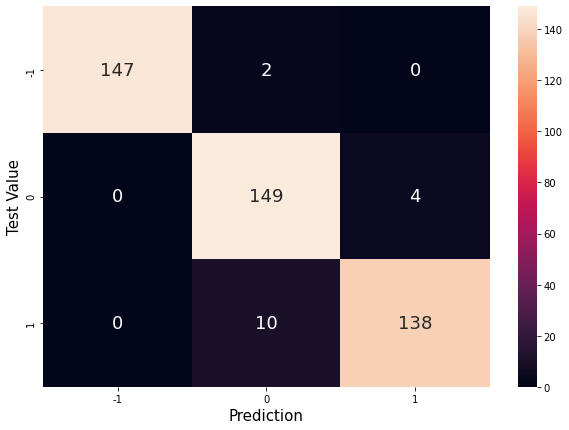

In [16]:
%matplotlib inline
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', annot_kws={"fontsize":18}, xticklabels=lbls, yticklabels=lbls)
plt.xlabel('Prediction', size=15)
plt.ylabel('Test Value', size=15)
plt.show()

<IPython.core.display.Javascript object>


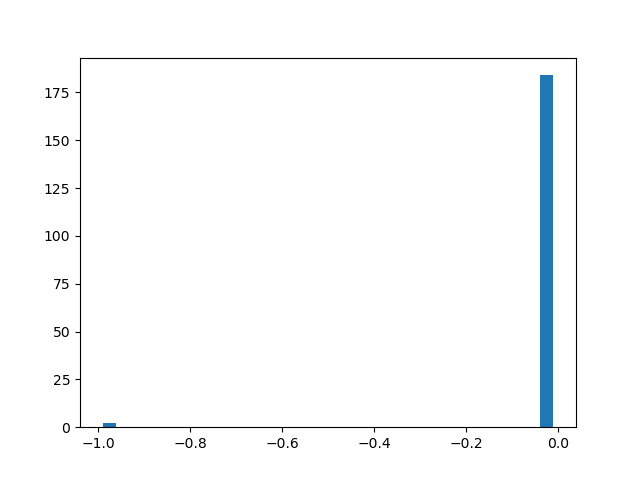

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.]),
 array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
        -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
        -0.1 , -0.05,  0.  ]),
 <a list of 20 Patch objects>)

In [27]:
%matplotlib notebook
n_bins = 20
plt.hist(offset, bins=n_bins, rwidth=0.6)

In [15]:
import random as rd